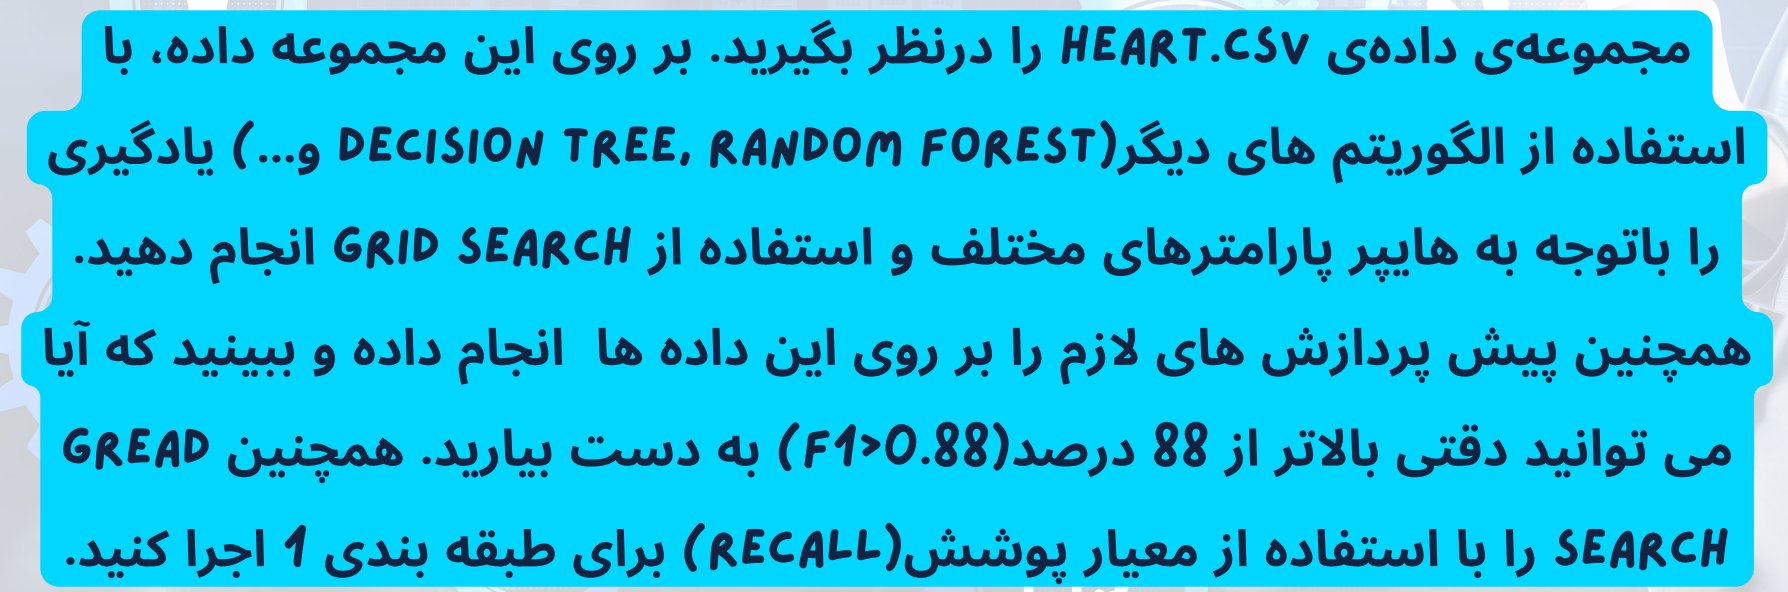

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
pd.set_option('display.max_columns', 30)

# **Loading Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/preprocessing/flights.csv", index_col="id")

# **Data Overview**

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [ ]:
df.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


In [ ]:
row, col = df.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 336776
Number of Columns: 20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

# **EDA**

In [ ]:
missing_val = pd.DataFrame(df.isna().sum() / df.shape[0], columns=["pct_missing"])
missing_val["number_of_missing"] = df.isna().sum()
missing_val.style.background_gradient()

,pct_missing,number_of_missing
year,0.000000,0
month,0.000000,0
day,0.000000,0
dep_time,0.024512,8255
sched_dep_time,0.000000,0
dep_delay,0.024512,8255
arr_time,0.025872,8713
sched_arr_time,0.000000,0
arr_delay,0.028001,9430
carrier,0.000000,0


In [ ]:
df[df["dep_delay"].isna()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 16:00:00,ExpressJet Airlines Inc.
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00,American Airlines Inc.
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00,American Airlines Inc.
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00,JetBlue Airways
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02 15:00:00,ExpressJet Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air


In [ ]:
df.nunique()

year                 1
month               12
day                 31
dep_time          1318
sched_dep_time    1021
dep_delay          527
arr_time          1411
sched_arr_time    1163
arr_delay          577
carrier             16
flight            3844
tailnum           4043
origin               3
dest               105
air_time           509
distance           214
hour                20
minute              60
time_hour         6936
name                16
dtype: int64

In [ ]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [ ]:
df[df.duplicated()]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
def plot_distributions(data, color='blue'):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    num_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    num_rows = math.ceil(num_features / num_cols)

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

    for i, column in enumerate(data.columns):
        row = i // num_cols
        col = i % num_cols
        axs[row][col].hist(data[column], bins=30, alpha=0.5, color=color)
        axs[row][col].set_title(f'Distribution of {column}')
        axs[row][col].set_xlabel(column)
        axs[row][col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show

In [ ]:
selected_col_hist = ['dep_time',
                     'sched_dep_time',
                     'dep_delay',
                     'arr_time',
                     'sched_arr_time',
                     'arr_delay',
                     'flight',
                     'air_time',
                     'distance']

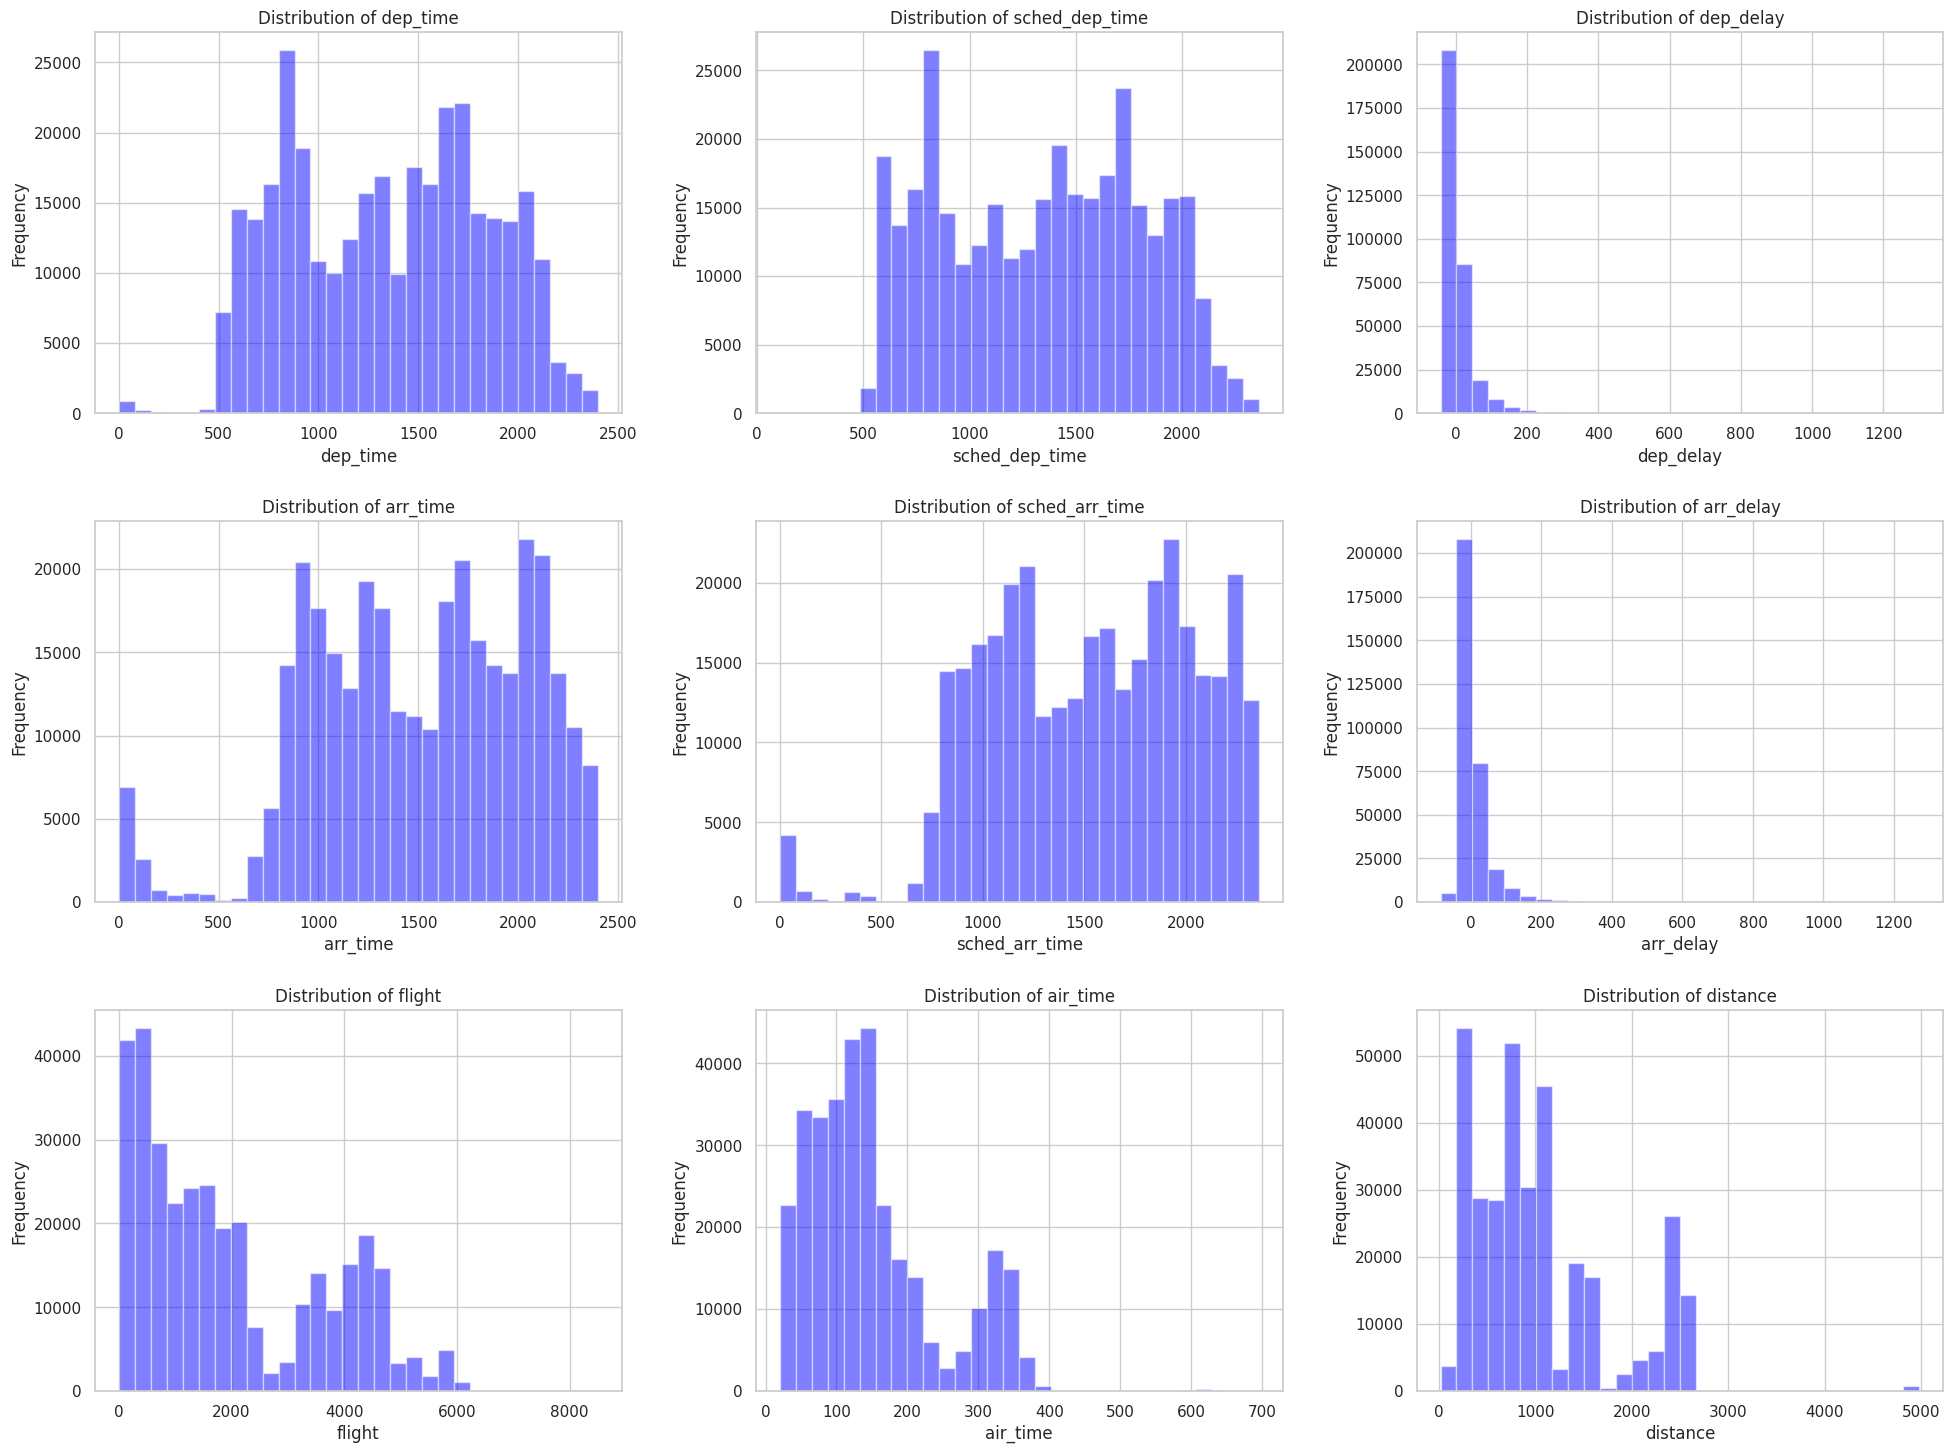

In [ ]:
plot_distributions(df[selected_col_hist])

# **Preprocessing**

In [ ]:
df["time_hour"] = pd.to_datetime(df["time_hour"], format="%Y-%m-%d %H:%M:%S")
df["time_hour"]

id
0        2013-01-01 05:00:00
1        2013-01-01 05:00:00
2        2013-01-01 05:00:00
3        2013-01-01 05:00:00
4        2013-01-01 06:00:00
                 ...        
336771   2013-09-30 14:00:00
336772   2013-09-30 22:00:00
336773   2013-09-30 12:00:00
336774   2013-09-30 11:00:00
336775   2013-09-30 08:00:00
Name: time_hour, Length: 336776, dtype: datetime64[ns]

In [ ]:
df.dtypes

year                       int64
month                      int64
day                        int64
dep_time                 float64
sched_dep_time             int64
dep_delay                float64
arr_time                 float64
sched_arr_time             int64
arr_delay                float64
carrier                   object
flight                     int64
tailnum                   object
origin                    object
dest                      object
air_time                 float64
distance                   int64
hour                       int64
minute                     int64
time_hour         datetime64[ns]
name                      object
dtype: object

In [ ]:
df.select_dtypes(exclude='number').nunique()

carrier        16
tailnum      4043
origin          3
dest          105
time_hour    6936
name           16
dtype: int64

In [ ]:
df = df.drop(["year", "tailnum", "carrier", "time_hour"], axis=1)

In [ ]:
df.shape

(336776, 16)

## **Missing Value**

In [ ]:
df.isna().sum()

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
flight               0
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
name                 0
dtype: int64

In [ ]:
df["arr_delay"] = df["arr_delay"].fillna(df["arr_time"] - df["sched_arr_time"])

In [ ]:
df.isna().sum()

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         8713
flight               0
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
name                 0
dtype: int64

In [ ]:
cat_name_list = ['origin', 'dest', "name"]
num_name_list =  list((df.select_dtypes(include="number").columns))

In [ ]:
num_name_list

['month',
 'day',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'flight',
 'air_time',
 'distance',
 'hour',
 'minute']

### **KnnImputer**

In [ ]:
knnimputer = KNNImputer(n_neighbors=3)
df[num_name_list] = knnimputer.fit_transform(df[num_name_list])

In [ ]:
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,517.000000,515.0,2.000000,830.000000,819.0,11.000000,1545.0,EWR,IAH,227.000000,1400.0,5.0,15.0,United Air Lines Inc.
1,1.0,1.0,533.000000,529.0,4.000000,850.000000,830.0,20.000000,1714.0,LGA,IAH,227.000000,1416.0,5.0,29.0,United Air Lines Inc.
2,1.0,1.0,542.000000,540.0,2.000000,923.000000,850.0,33.000000,1141.0,JFK,MIA,160.000000,1089.0,5.0,40.0,American Airlines Inc.
3,1.0,1.0,544.000000,545.0,-1.000000,1004.000000,1022.0,-18.000000,725.0,JFK,BQN,183.000000,1576.0,5.0,45.0,JetBlue Airways
4,1.0,1.0,554.000000,600.0,-6.000000,812.000000,837.0,-25.000000,461.0,LGA,ATL,116.000000,762.0,6.0,0.0,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9.0,30.0,1451.000000,1455.0,-4.000000,1601.000000,1634.0,-19.666667,3393.0,JFK,DCA,40.333333,213.0,14.0,55.0,Endeavor Air Inc.
336772,9.0,30.0,2223.333333,2200.0,23.333333,1524.666667,2312.0,12.666667,3525.0,LGA,SYR,37.666667,198.0,22.0,0.0,Endeavor Air Inc.
336773,9.0,30.0,1212.333333,1210.0,2.333333,1325.666667,1330.0,-4.333333,3461.0,LGA,BNA,103.666667,764.0,12.0,10.0,Envoy Air


In [ ]:
df.shape

(336776, 16)

### **Label Encoder**

In [ ]:
le = LabelEncoder()
df[cat_name_list] = df[cat_name_list].apply(le.fit_transform)

In [ ]:
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
id,,,,,,,,,,,,,,,,
0,1.0,1.0,517.000000,515.0,2.000000,830.000000,819.0,11.000000,1545.0,0,43,227.000000,1400.0,5.0,15.0,14
1,1.0,1.0,533.000000,529.0,4.000000,850.000000,830.0,20.000000,1714.0,2,43,227.000000,1416.0,5.0,29.0,14
2,1.0,1.0,542.000000,540.0,2.000000,923.000000,850.0,33.000000,1141.0,1,58,160.000000,1089.0,5.0,40.0,2
3,1.0,1.0,544.000000,545.0,-1.000000,1004.000000,1022.0,-18.000000,725.0,1,12,183.000000,1576.0,5.0,45.0,9
4,1.0,1.0,554.000000,600.0,-6.000000,812.000000,837.0,-25.000000,461.0,2,4,116.000000,762.0,6.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9.0,30.0,1451.000000,1455.0,-4.000000,1601.000000,1634.0,-19.666667,3393.0,1,28,40.333333,213.0,14.0,55.0,4
336772,9.0,30.0,2223.333333,2200.0,23.333333,1524.666667,2312.0,12.666667,3525.0,2,99,37.666667,198.0,22.0,0.0,4
336773,9.0,30.0,1212.333333,1210.0,2.333333,1325.666667,1330.0,-4.333333,3461.0,2,10,103.666667,764.0,12.0,10.0,5


### **StandardSacaler**

In [ ]:
sc = StandardScaler()
sc_data = sc.fit_transform(df)
scaled_data = pd.DataFrame(sc_data, columns=sc.get_feature_names_out(input_features=df.columns))
scaled_data

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,origin,dest,air_time,distance,hour,minute,name
0,-1.625007,-1.677668,-1.712400,-1.774433,-0.271138,-1.269064,-1.442097,0.067173,-0.261520,-1.165402,-0.214505,0.827977,0.491096,-1.754925,-0.581846,1.461698
1,-1.625007,-1.677668,-1.679632,-1.744476,-0.221183,-1.231468,-1.419984,0.225079,-0.157996,1.282981,-0.214505,0.827977,0.512917,-1.754925,0.143512,1.461698
2,-1.625007,-1.677668,-1.661200,-1.720938,-0.271138,-1.094242,-1.379780,0.453165,-0.508998,0.058789,0.318842,0.110488,0.066947,-1.754925,0.713436,-1.279600
3,-1.625007,-1.677668,-1.657104,-1.710239,-0.346070,-0.941977,-1.034021,-0.441635,-0.763827,0.058789,-1.316755,0.356790,0.731129,-1.754925,0.972493,0.319490
4,-1.625007,-1.677668,-1.636623,-1.592551,-0.470957,-1.302900,-1.405913,-0.564451,-0.925545,1.282981,-1.601206,-0.360698,-0.379024,-1.540393,-1.359015,-1.051159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,0.717975,1.629590,0.200459,0.236972,-0.421002,0.180269,0.196238,-0.470877,0.870507,0.058789,-0.747851,-1.170996,-1.127764,0.175863,1.490605,-0.822717
336772,0.717975,1.629590,1.782221,1.831117,0.261712,0.036777,1.559171,0.096414,0.951366,1.282981,1.776656,-1.199553,-1.148221,1.892119,-1.359015,-0.822717
336773,0.717975,1.629590,-0.288337,-0.287277,-0.262812,-0.337305,-0.414871,-0.201852,0.912162,1.282981,-1.387867,-0.492773,-0.376296,-0.253201,-0.840902,-0.594276
336774,0.717975,1.629590,-0.318375,-0.396407,-0.021364,-0.285297,-0.386728,-0.196004,0.980157,1.282981,-0.961190,-0.942542,-0.846816,-0.467733,1.697850,-0.594276
